In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

In [17]:
parks_df = pd.read_csv('../data/parks/hanoi.csv')
area_df = pd.read_csv('../data/area/hanoi.csv')
distance_df = pd.read_csv('../data/distance/hanoi.csv')

df = pd.merge(area_df, distance_df, on='name', how='inner') 
df = pd.merge(df, parks_df, on='name', how='inner') 

df['area'] = df['area'] / 1000000
df = df.sort_values(by=['area', 'distance'], ascending=[False, True])

df = df.drop_duplicates(subset=['name'], keep='first')
df = df[['name', 'area', 'distance', 'lat', 'lon']]

df.head(20)

,name,area,distance,lat,lon
0,Công viên Yên Sở,1.402809,3165.1,20.961351,105.855646
2,Công viên Thống Nhất,0.458439,3588.3,21.013003,105.844837
3,Công viên Hòa Bình,0.208562,13316.2,21.065209,105.786716
4,Công viên Tuổi trẻ Thủ đô,0.179823,1905.4,21.006060,105.856859
5,Công viên Thanh Xuân,0.169474,8093.4,21.002591,105.796691
6,Công viên Long Biên,0.159702,40723.1,21.060802,105.905120
7,Công viên Mễ Trì,0.137645,11540.3,21.007672,105.771766
8,Công viên Hồ Mễ Trì,0.129875,8920.9,20.997361,105.791117
9,Công viên Thiên Văn Học Dương Nội,0.128398,12944.0,20.980628,105.757492
10,Công viên Nam An Khánh,0.099892,18338.2,20.999004,105.713305


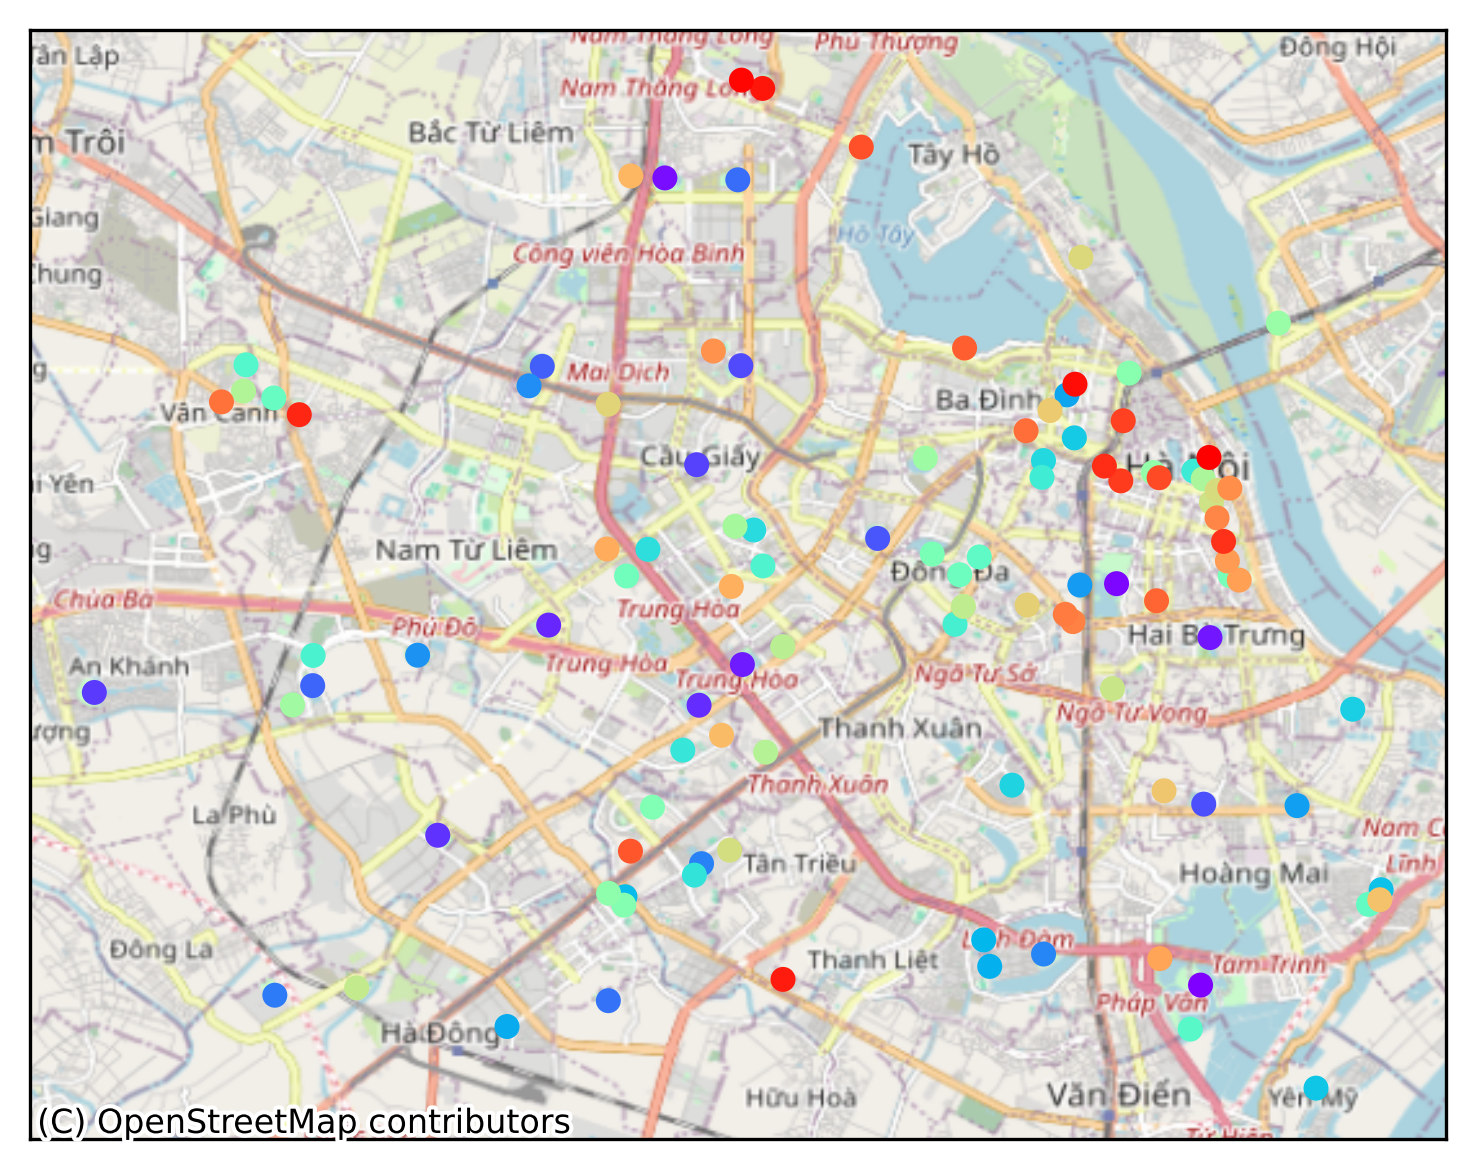

In [27]:
def plot(df):
    plt.figure(dpi=300)
    ax = plt.gca()
    ax.set_aspect('equal')
    colors = plt.cm.rainbow(np.linspace(0, 1, len(df)))
    scatter = plt.scatter(df['lon'], df['lat'], c=colors, edgecolor='none')
    ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
    plt.show()
    
plot(
    df[df['distance'] < 20000],
)